In [1]:
import os
import pandas as pd
import numpy as np
os.chdir(r'C:\Users\фора\Desktop\irdm\assignment2')
test=pd.read_csv(r'test.csv',index_col='Unnamed: 0')
train=pd.read_csv(r'train.csv',index_col='Unnamed: 0')
y=pd.read_csv(r'train_answers.csv',index_col='Unnamed: 0')
answers=pd.read_csv(r'real_answers_for_test.csv',index_col='Unnamed: 0')

In [2]:
print('train shape :', train.shape)
print('test shape :', test.shape)
print('y shape :', y.shape)
print('answers shape :', answers.shape)

train shape : (426, 31)
test shape : (143, 31)
y shape : (426, 1)
answers shape : (143, 1)


In [3]:
answers

,diagnosis
421,B
47,M
292,B
186,M
414,M
...,...
232,B
413,B
514,M
244,M


In [4]:
one_neighbor_list=[]
#creating list for collecting one_neighbor list distances 
for j in range (len(test)):
    distlist=[] 
    for i in range (len(train)):
        #np.linalg.norm for euclidean distance method 
        distance=np.linalg.norm(test.iloc[j]-train.iloc[i])
        #appending all distances 
        distlist.append(distance)
        #here we do append all the minimum distances
    one_neighbor_list.append(y.iloc[distlist.index(min(distlist))])


len(one_neighbor_list)

143

In this example I just firstly created method for one_neighbor collection , so I decided to put it too


In the next cells I created universal function for all types



In [5]:
one_neighbor_list=pd.DataFrame(one_neighbor_list)

In [6]:
x=0
for f, b in zip(one_neighbor_list['Diagnosis'], answers['diagnosis']):
    if(f!=b):
        x=x+1
print()   
accuracy_for_one_neighbor=((len(one_neighbor_list)-x))/len(one_neighbor_list)
accuracy_for_one_neighbor

0.958041958041958

In [7]:
import numpy as np
from scipy.stats import mode

def predict(train, y , test, k):
    labels_labels=[]
    dist_labels = []     
    for j in range(len(test)): 
        distlist = []
        for i in range(len(train)): 
            distances = np.linalg.norm(test.iloc[j]-train.iloc[i])
            #Calculating the distance
            distlist.append(distances) 
        distlist = np.array(distlist)    
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(distlist)[:k] 
        dist_labels.append(y.iloc[dist])

        #Labels of the K datapoints from above
        labels = y.iloc[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        labels_labels.append(lab)
 
    return labels_labels





In [8]:
def accuracy_test(n_neighbors,answers):
    x=0
    #in the following for loop we do comparison elements of our collections with the real answers 
    for f, b in zip(n_neighbors[0], answers['diagnosis']):
        #if they are not equal , so then we count number of failures
        if(f!=b):
            x=x+1
    print()   
    #simple formula for printing out accuracy 
    accuracy_for_n_neighbor=((len(n_neighbors)-x))/len(n_neighbors)
    return accuracy_for_n_neighbor

#Using this function for all KNN numbers 
one_neighbors=pd.DataFrame(predict(train,y,test,1))
three_neighbors=pd.DataFrame(predict(train,y,test,3))
five_neighbors=pd.DataFrame(predict(train,y,test,5))
six_neighbors=pd.DataFrame(predict(train,y,test,6))
seven_neighbors=pd.DataFrame(predict(train,y,test,7))
nine_neighbors=pd.DataFrame(predict(train,y,test,9))

In [9]:
#Those are the results of my calculations
print('Accuracy test for 1 :',accuracy_test(one_neighbors,answers))
print('Accuracy test for 3 :',accuracy_test(three_neighbors,answers))
print('Accuracy test for 5 :',accuracy_test(five_neighbors,answers))
print('Accuracy test for 6 :',accuracy_test(six_neighbors,answers))
print('Accuracy test for 7 :',accuracy_test(seven_neighbors,answers))
print('Accuracy test for 9 :',accuracy_test(nine_neighbors,answers))


Accuracy test for 1 : 0.958041958041958

Accuracy test for 3 : 0.9440559440559441

Accuracy test for 5 : 0.9440559440559441

Accuracy test for 6 : 0.958041958041958

Accuracy test for 7 : 0.951048951048951

Accuracy test for 9 : 0.958041958041958


In [10]:
#Storing to the new variables for convenience . Because it's actually difficult to text them inside y in plotting
acc_1=accuracy_test(one_neighbors,answers)
acc_3=accuracy_test(three_neighbors,answers)
acc_5=accuracy_test(five_neighbors,answers)
acc_6=accuracy_test(six_neighbors,answers)
acc_7=accuracy_test(seven_neighbors,answers)
acc_9=accuracy_test(nine_neighbors,answers)

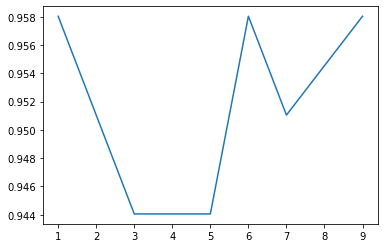

In [11]:
import matplotlib.pyplot as plt
#plotting variables along with their number of neighbors
y=[acc_1,acc_3,acc_5,acc_6,acc_7,acc_9]
x=[1,3,5,6,7,9]
plt.plot(x,y)

# PART 2

In [25]:
import os
import pandas as pd
import numpy as np
from os.path import dirname, join as pjoin
import scipy.io
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt 


In [26]:
#importing dataset
mat = scipy.io.loadmat('ex7data2.mat')
#defining it as X
X=mat['X']
#number of clusters
K = 3
#initial points that were posted on moodle
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [27]:
m= X.shape[0]
n= X.shape[1]

def findClosestCentroids(X, centroids):

    K = centroids.shape[0]
    
    idx = np.zeros((m, 1))

    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        dist = np.argmin(distances)
        idx[i] = dist
    
    return idx


idx = findClosestCentroids(X, initial_centroids)
#result as we had in screenshot 
idx[:3]

array([[0.],
       [2.],
       [1.]])

In [28]:
def computeCentroids(X, idx, K):
    
    centroids = np.zeros((K, n))

    for k in range(K):
        centroids[k, :] = np.mean(X[idx.ravel() == k, :], axis=0)
    
    return centroids

print('Centroids computed after initial finding of closest centroids: ')
print()
centroids = computeCentroids(X, idx, K)
print(centroids)


Centroids computed after initial finding of closest centroids: 

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [29]:
#Thing as was given in screenshot
max_iters=10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
#after 10 iteration cycles 
for i in range(max_iters):
    idx = findClosestCentroids(X, centroids)
    centroids = computeCentroids(X, idx, K)
    
print(centroids)
#We had such result 

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


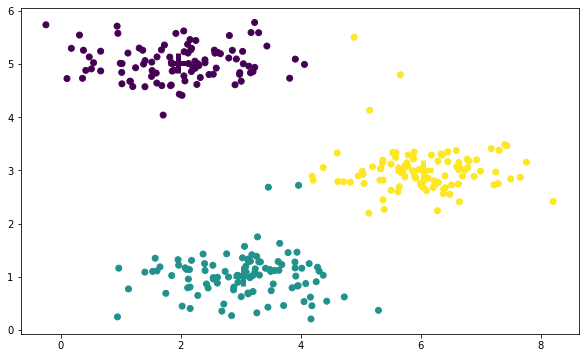

In [30]:
#I could not highlight marker color , so I hope you will see them in scatterplot , I actually plot them))
c=[0, 1, 2]
fig = plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=idx)
plt.scatter(centroids[:, 0], centroids[:, 1], c=c, marker="+",s=400,linewidth=5)
plt.show()